**1) Grupo**
1. Lucas Cogo
2. João Pedro Ciglioni
3. Raldijar Leao
4. Tatiana Domingos





In [2]:
!pip install xgboost

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_diabetes, make_blobs, make_moons, make_circles
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# Clusterização

## Aplicando K-means a exemplo didático

1. Mostre o que acontece com o resultado da clusterização quando se muda o ruído na geração do dataset para 0.3 e para 0.6?

R: Podemos observar uma maior dispersão entre os pontos ao aumentarmos o nível de ruído.

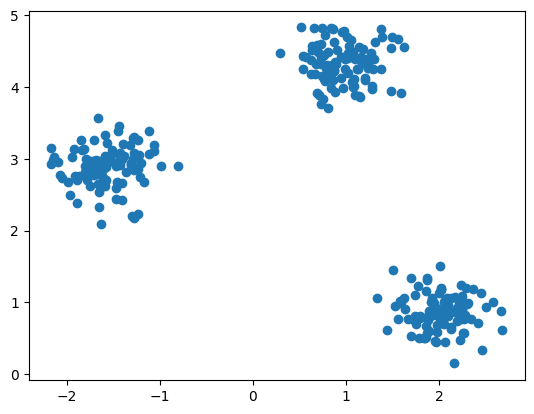

In [4]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.27, random_state=0)

plt.scatter(X[:,0], X[:,1])

plt.show()

2. Dada a performance do K-means, discora se é uma alternativa válida para esse dataset e porque. Dada a performance do K-means, discora se é uma alternativa válida para esse dataset e porque?

R: Este dataset apresenta clusters bem definidos, com a formação de agrupamentos claros e poucos outliers, o que torna o k-means uma boa opção




3. Agora trein mude o rúido como 0.7, ache os clusters para o conjunto inteiro. Com isso feito separe os dados em treino e teste e achei o clusters novamente, o que mudou? Como os clusters se comportam com o conjunto de teste?

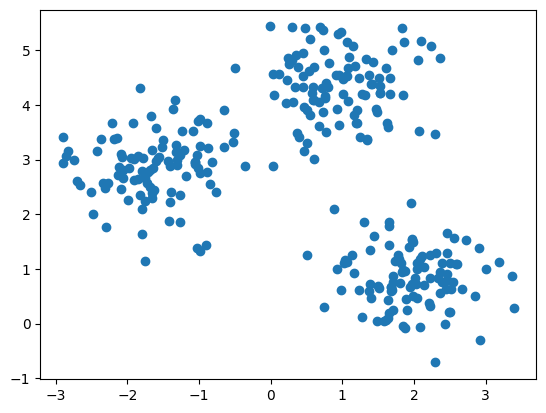

In [8]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.58, random_state=0)

plt.scatter(X[:,0], X[:,1])

plt.show()

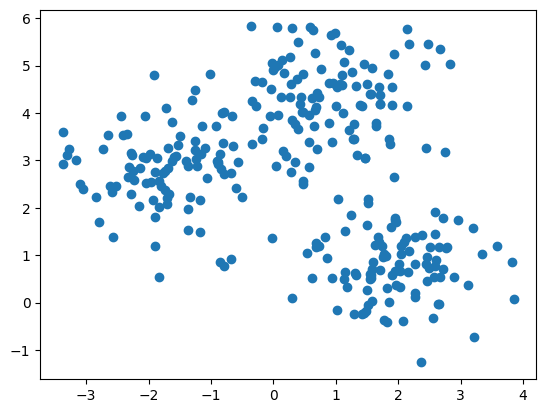

In [9]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.78, random_state=0)

plt.scatter(X[:,0], X[:,1])

plt.show()

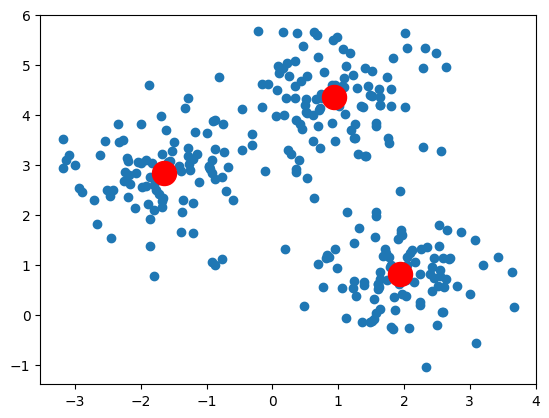

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1**-4, random_state=42)

# pred_y = kmeans.fit_predict(X)
kmeans.fit(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.show()

In [11]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

In [13]:
# Treinando o modelo KMeans com os dados de treino
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=350, tol=1e-4, random_state=42)
kmeans.fit(X_train)

KMeans(max_iter=350, n_clusters=3, n_init=10, random_state=42)

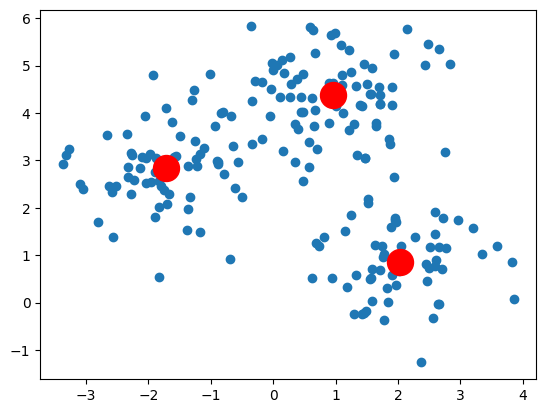

In [14]:
# Visualizando os clusters no conjunto de treino
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=350, c='red')
plt.show()

In [15]:
# Predizendo os clusters para o conjunto de teste
pred_y_test = kmeans.predict(X_test)

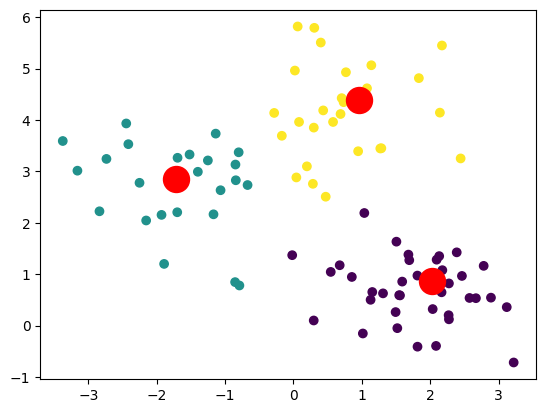

In [16]:
# Visualizando os clusters no conjunto de teste
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_y_test)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=350, c='red')
plt.show()

R: O aumento para 0,7 resulta em maior dispersão dos pontos. O modelo foi treinado exclusivamente com os dados de treino, e os clusters encontrados refletem esse subconjunto. Ao ser aplicado ao conjunto de teste, podem surgir algumas discrepâncias, especialmente nos pontos próximos às fronteiras dos clusters, já que o modelo pode não ter encontrado variações semelhantes durante o treino

## O que acontece quando os dados estão intercalados?

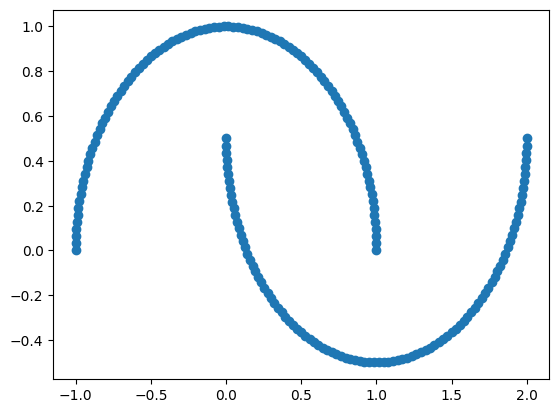

In [18]:
X, y = make_moons(n_samples=200, noise=0, random_state=47)

plt.scatter(X[:,0], X[:,1])

plt.show()

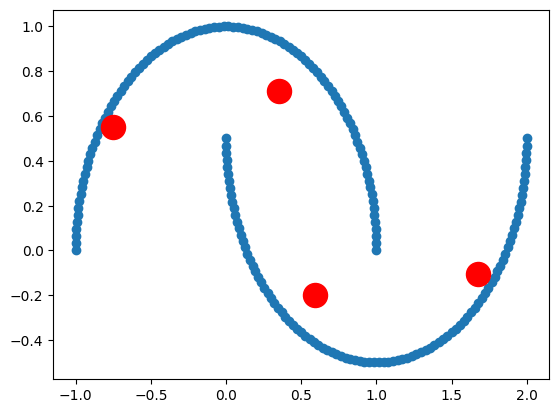

In [19]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=350, tol=1**-4, random_state=0)

pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.show()

1. Mostre o que acontece com o resultado da clusterização quando se muda o ruído na geração do dataset para 0.3 e para 0.6?

R: Os clusters são visíveis, porém os dados estão mais dispersos, dificultando a definição precisa dos agrupamentos.

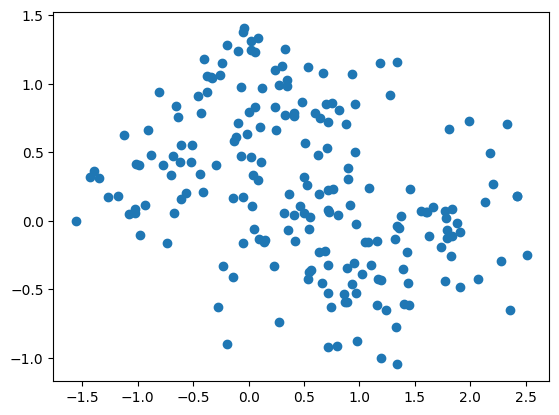

In [20]:
X, y = make_moons(n_samples=200, noise=0.3, random_state=47)

plt.scatter(X[:,0], X[:,1])

plt.show()

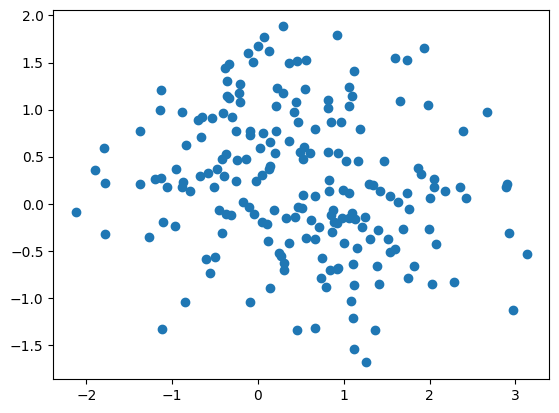

In [21]:
X, y = make_moons(n_samples=200, noise=0.6, random_state=47)

plt.scatter(X[:,0], X[:,1])

plt.show()

2. Dada a performance do K-means, discora se é uma alternativa válida para esse dataset e porque?

R: Estamos lidando com um conjunto de dados mais complexo, com grande dispersão de valores, o que torna o K-means uma escolha menos adequada

## Como clusterizar quando elementos estão centrados?

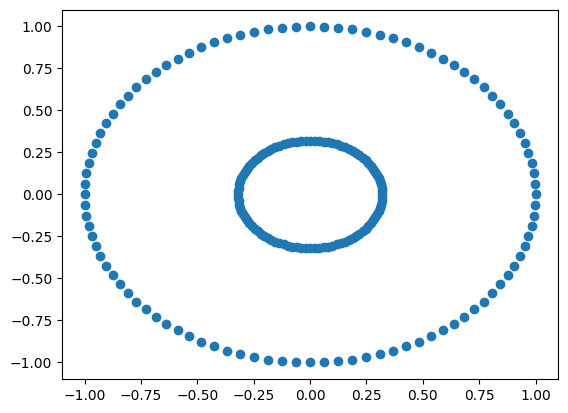

In [23]:
X, y = make_circles(n_samples=200, noise=0, factor=0.32, random_state=47)

plt.scatter(X[:,0], X[:,1])

plt.show()

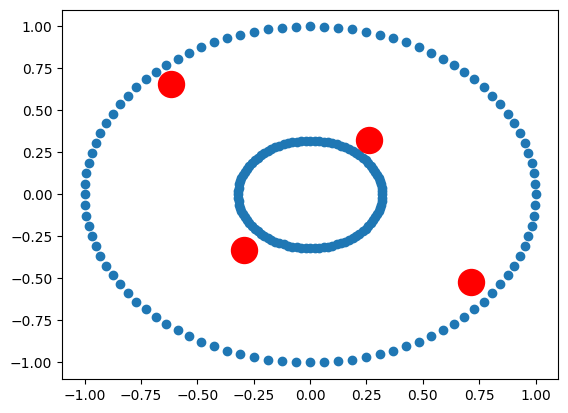

In [24]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=350, tol=1**-4, random_state=0)

pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=350, c='red')

plt.show()

### Atividades

1. Mostre o que acontece com o resultado da clusterização quando se muda o ruído na geração do dataset para 0.3 e para 0.6?

R: A clusterização continua complexa, o que aumenta a dificuldade de identificar claramente os grupos

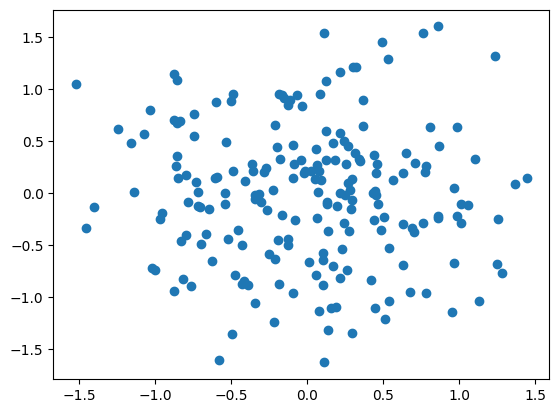

In [25]:
X, y = make_circles(n_samples=200, noise=0.37, factor=0.37, random_state=47)

plt.scatter(X[:,0], X[:,1])

plt.show()

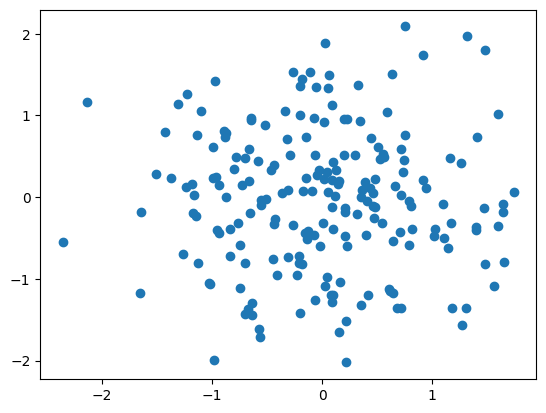

In [26]:
X, y = make_circles(n_samples=200, noise=0.6, factor=0.6, random_state=47)

plt.scatter(X[:,0], X[:,1])

plt.show()

2. O que muda quando a variável factor é 0.1 e quando é 1?

Quando o fator é 0,1: O círculo interno será muito menor em comparação ao círculo externo.

Quando o fator é 1: Embora não seja possível definir exatamente fator = 1, quando ele se aproxima desse valor, o círculo interno quase se iguala em tamanho ao círculo externo.



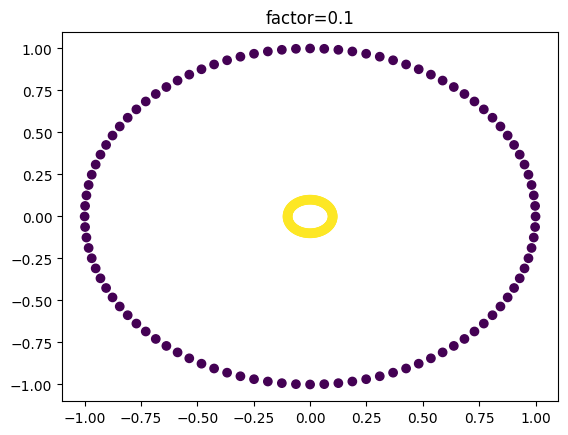

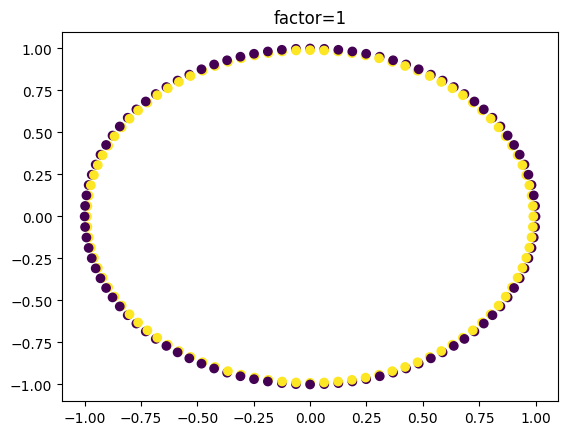

In [27]:
# Com factor=0.1
X, y = make_circles(n_samples=200, noise=0, factor=0.1, random_state=47)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('factor=0.1')
plt.show()

# Com factor=1
X, y = make_circles(n_samples=200, noise=0, factor=0.99, random_state=47)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('factor=1')
plt.show()

3. Dada a performance do K-means, discora se é uma alternativa válida para esse dataset e porque?

R: O K-means não é a melhor opção para o dataset make_circles, pois há um alto grau de complexidade na separação dos clusters



## Aplicando análise de dados de vinho

[Link para dataset](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?select=wine-clustering.csv)

### Atividades

1. Mostre como aplicar K-means utilizando como variáveis de entrada "Alcohol" e "Color_Intensity". Qual a análise que você consegue fazer da relação das duas variáveis e dos grupos que elas geram?

R: Temos uma dificuldade em encontrar os padrões, por se tratar de valores dispersos.

Após executar o k-mens podemos ter as seguintes anotações:

Cluster 1 (roxo): Vinhos com menor teor alcoólico e intensidade de cor.
Cluster 2 (verde): Vinhos com teor alcoólico moderado e maior intensidade de cor.
Cluster 3 (amarelo): Vinhos com maior teor alcoólico e intensidade de cor moderada.

1. Faça a mesma coisa para Malic_Acid e Total_Phenols


R: Temos uma dificuldade em encontrar os padrões, por se tratar de valores dispersos. Mas aplicando o modelo do K-mens com 3 cluster conseguimos separar os grupos e idenficar as correlações existentens.


1. Com base na análise do conjunto de dados, é possível identificar de que vinícula vem o vinho? Por que?

R: Para saber de qual vinícula acredito que não, seriá necessário ter mais informações como a origem de cada vinho, dessa forma poderiamos separar cada cluster por vinicula existente na base de dados.



In [28]:
wine_data = pd.read_csv("/content/wine-clustering.csv")
wine_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/wine-clustering.csv'

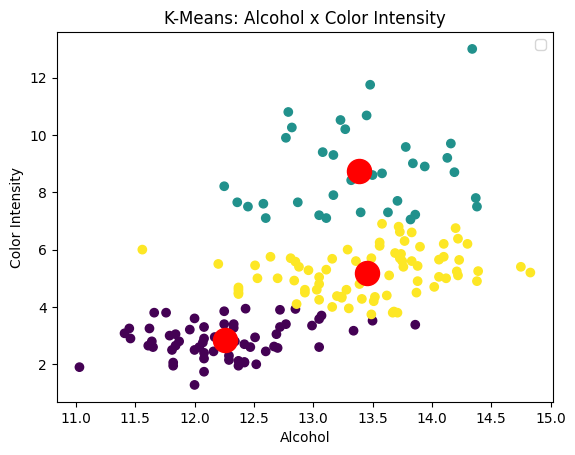

In [ ]:
X = wine_data[['Alcohol', 'Color_Intensity']]

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
wine_data['Cluster'] = kmeans.fit_predict(X)

plt.scatter(X['Alcohol'], X['Color_Intensity'], c=wine_data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('K-Means: Alcohol x Color Intensity')
plt.legend()
plt.show()

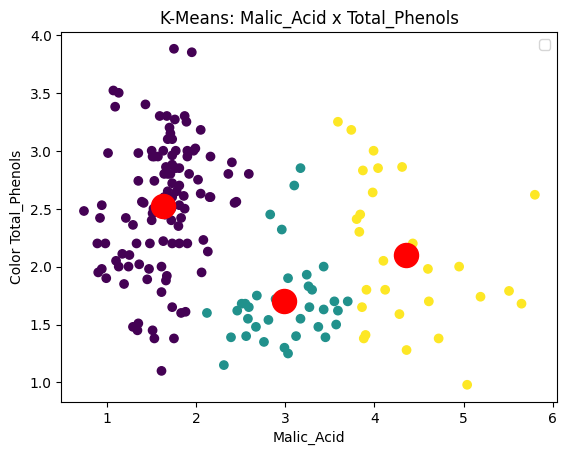

In [ ]:
X = wine_data[['Malic_Acid', 'Total_Phenols']]

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
wine_data['Cluster'] = kmeans.fit_predict(X)

plt.scatter(X['Malic_Acid'], X['Total_Phenols'], c=wine_data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Malic_Acid')
plt.ylabel('Color Total_Phenols')
plt.title('K-Means: Malic_Acid x Total_Phenols')
plt.legend()
plt.show()

# Regressão

## Predizendo evolução de diabetes

[Link para dataset utilizado](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

### Aplicação de árvores de decisão

In [30]:
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3)

regressor = DecisionTreeRegressor()

regressor.fit(X_diabetes_train, y_diabetes_train)

DecisionTreeRegressor()

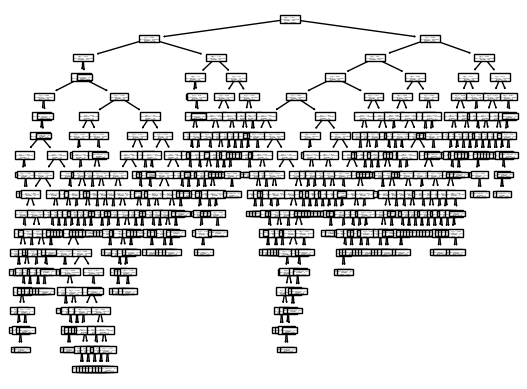

In [31]:
_ = plot_tree(regressor)

### Aplicação de regressão linear

In [33]:
regressor_linear = LinearRegression()

regressor_linear.fit(X_diabetes_train, y_diabetes_train)

LinearRegression()

### Comparando as soluções

In [34]:
y_pred_arvore_regressao = regressor.predict(X_diabetes_train)
y_pred_regressao_linear = regressor_linear.predict(X_diabetes_train)

MRSE_arvore_regressao = mean_squared_error(y_diabetes_train, y_pred_arvore_regressao)
MRSE_regressao_linear = mean_squared_error(y_diabetes_train, y_pred_regressao_linear)

print(f"MRSE da arvore de regressao eh {MRSE_arvore_regressao:.2f}, enquanto da regressao linear {MRSE_regressao_linear:.2f}")

MRSE da arvore de regressao eh 0.00, enquanto da regressao linear 3031.66


In [35]:
y_pred_arvore_regressao = regressor.predict(X_diabetes_test)
y_pred_regressao_linear = regressor_linear.predict(X_diabetes_test)

MRSE_arvore_regressao = mean_squared_error(y_diabetes_test, y_pred_arvore_regressao)
MRSE_regressao_linear = mean_squared_error(y_diabetes_test, y_pred_regressao_linear)

print(f"MRSE da arvore de regressao eh {MRSE_arvore_regressao:.2f}, enquanto da regressao linear {MRSE_regressao_linear:.2f}")

MRSE da arvore de regressao eh 6600.81, enquanto da regressao linear 2536.53


#### Atividades

1. Que outras métricas de avaliação poderiam ser usadas?

R: MAE, MSE e R quadrado

1. Teria como configurar a regressão linear?

R: Não

1. Teria como configurar a regressão de árvore?

R: Sim

1. Por que ao plotar a árvore ela fica tão extensa?

R: As árvores de regressão tendem a sofrer de overfitting, principalmente quando não são impostas limitações à sua profundidade ou ao número mínimo de amostras por nó. Sem restrições na complexidade, a árvore pode gerar muitos ramos para se ajustar perfeitamente aos dados de treino, resultando em uma estrutura com grande profundidade e excessivos nós

1. Qual melhor dos dois modelos e por que?

Entre as soluções comparadas, a regressão linear foi a que apresentou maior consistência nas previsões, tanto nos dados de treino quanto nos de teste



## Predição de preço de casas

## Atividade

Com base no [dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) façam

1. A predição do preço das casas
1. Compare modelos como [XGBoost](https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html) e árvode de decisão com regressão linear
1. Façam comparações de métricas diferentes para medir a qualidade das predições e expliquem porque as diferenças
1. Se vocês fossem utilizar um dos medelos que desenvolveram em produção, qual usuariam e por que?

In [ ]:
house = pd.read_csv("/content/Housing.csv")
house.info()

In [ ]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# Codificar variáveis categóricas
label_encoder = LabelEncoder()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Use the original dataframe 'house' to encode categorical columns
for col in categorical_cols:
    house[col] = label_encoder.fit_transform(house[col])

# Separar features (X) e target (y)
X = house.drop(columns=['price'])
y = house['price']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Verificar a preparação dos dados e os primeiros valores
X_train.head(), y_train.head()

(     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
 454  4500         3          1        2         1          0         0   
 392  3990         3          1        2         1          0         0   
 231  4320         3          1        1         1          0         0   
 271  1905         5          1        2         0          0         1   
 250  3510         3          1        3         1          0         0   
 
      hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
 454                0                1        0         0                 2  
 392                0                0        0         0                 1  
 231                0                0        0         1                 1  
 271                0                0        0         0                 1  
 250                0                0        0         0                 1  ,
 454    3143000
 392    3500000
 231    4690000
 271    4340000
 250    4515000

In [ ]:
# Criar e treinar o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = linear_model.predict(X_test)

# Avaliar o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 733152.2053964165
RMSE: 979342.0642354129
R² Score: 0.7235015223200351


In [ ]:
# Criar o modelo de Árvore de Decisão
decision_tree_model = DecisionTreeRegressor(random_state=0)

# Treinar o modelo com o conjunto de treino
decision_tree_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_tree = decision_tree_model.predict(X_test)

# Avaliar o desempenho do modelo
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"MAE: {mae_tree}")
print(f"RMSE: {rmse_tree}")
print(f"R² Score: {r2_tree}")

MAE: 1052262.1951219512
RMSE: 1502366.4919784095
R² Score: 0.3493076438339551


In [ ]:
import xgboost as xgb

# Criar o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# Treinar o modelo com o conjunto de treino
xgb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o desempenho do modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

MAE: 909126.2667682926
RMSE: 1274699.093206734
R² Score: 0.531575845854321


In [ ]:
Solução da Atividade:

Utilizando uma divisão de 70% para treino e 30% para teste, o modelo escolhido seria a regressão linear.

Isso se deve ao fato de que, ao analisar as métricas, ele apresentou o melhor desempenho, conforme mostrado abaixo:

MAE: A regressão linear possui o menor MAE, indicando que, em média, suas previsões estão mais próximas dos valores reais. Isso sugere maior consistência nas previsões.

RMSE: O modelo de regressão linear também obteve o menor RMSE, o que significa que ele gera menos erros grandes em suas previsões.

R²: Com um R² de 0,72, a regressão linear explica 72% da variação nos preços das casas, tornando-se o modelo mais eficiente.